# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#format date
currdate = time.strftime("%x")
print(currdate)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

10/21/19


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
citydata = []  

# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Print sample city to see layout
from pprint import pprint
response = requests.get(query_url + "bisignano").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.5, 'lon': 16.27},
 'dt': 1571710836,
 'id': 2525550,
 'main': {'humidity': 100,
          'pressure': 1021,
          'temp': 56.25,
          'temp_max': 57.2,
          'temp_min': 54},
 'name': 'Bisignano',
 'sys': {'country': 'IT',
         'id': 6701,
         'sunrise': 1571721091,
         'sunset': 1571760425,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 70, 'speed': 8.05}}


In [4]:
# set print counters
rcd_cnt = 1
prnt_set = 1

# print log headers
print(f"Beginning Data Retrieval")
print(f"------------------------------")

# Loop through the list of cities and perform a request for data on each
for idx, city in enumerate(cities):           # enumerate enables count of iterations
    response = requests.get(query_url + city).json()
        
    # Skip record with warning message instead of error
    try:
        city_clouds=(response['clouds']['all'])
        city_country=(response['sys']['country'])
        city_date=(response['dt'])
        city_humidity=(response['main']['humidity'])
        city_lat=(response['coord']['lat'])
        city_lng=(response['coord']['lon'])
        city_maxtemp=(response['main']['temp_max'])
        city_windspeed=(response['wind']['speed'])
        
        citydata.append ({"City": city,
                          "Cloudiness": city_clouds,
                          "Country": city_country,
                          "Date": city_date,
                          "Humidity": city_humidity,
                          "Lat": city_lat,         
                          "Lng": city_lng,
                          "Max Temp": city_maxtemp,
                          "Wind Speed": city_windspeed})

        # group print sets
        if (idx % 50 == 0 and idx >= 50):
            rcd_cnt = 0
            prnt_set += 1

        print(f"Processing Record {rcd_cnt} of Set {prnt_set} | {city}")
        rcd_cnt += 1
    
    except KeyError:
        print(f"{city} not found.  Skipping...")

# print log footers
print(f"------------------------------")
print(f"Print Retrieval Complete")
print(f"------------------------------")
                

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | jamestown
taolanaro not found.  Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | hambantota
barentsburg not found.  Skipping...
Processing Record 11 of Set 1 | lavrentiya
Processing Record 12 of Set 1 | san policarpo
Processing Record 13 of Set 1 | charlestown
Processing Record 14 of Set 1 | touros
nizhneyansk not found.  Skipping...
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | quata
Processing Record 20 of Set 1 | cape town
Processing Record 21 of

Processing Record 1 of Set 4 | schweinfurt
Processing Record 2 of Set 4 | sisimiut
Processing Record 3 of Set 4 | lincoln
Processing Record 4 of Set 4 | kysyl-syr
Processing Record 5 of Set 4 | olga
Processing Record 6 of Set 4 | sibolga
Processing Record 7 of Set 4 | tanout
Processing Record 8 of Set 4 | georgetown
Processing Record 9 of Set 4 | lindi
Processing Record 10 of Set 4 | mayumba
Processing Record 11 of Set 4 | sainte-rose
Processing Record 12 of Set 4 | chicama
Processing Record 13 of Set 4 | gweru
Processing Record 14 of Set 4 | klyuchi
Processing Record 15 of Set 4 | miraflores
Processing Record 16 of Set 4 | geraldton
Processing Record 17 of Set 4 | oussouye
yuzhno-yeniseyskiy not found.  Skipping...
malakal not found.  Skipping...
Processing Record 18 of Set 4 | iskateley
mys shmidta not found.  Skipping...
Processing Record 19 of Set 4 | srednekolymsk
Processing Record 20 of Set 4 | santa isabel
Processing Record 21 of Set 4 | esik
Processing Record 22 of Set 4 | prad

Processing Record 5 of Set 8 | port hawkesbury
Processing Record 6 of Set 8 | pozo colorado
Processing Record 7 of Set 8 | saraland
Processing Record 8 of Set 8 | baykit
Processing Record 9 of Set 8 | broome
Processing Record 10 of Set 8 | chifeng
Processing Record 11 of Set 8 | southbridge
Processing Record 12 of Set 8 | kearney
Processing Record 13 of Set 8 | port blair
dolbeau not found.  Skipping...
Processing Record 14 of Set 8 | flin flon
Processing Record 15 of Set 8 | bodden town
Processing Record 16 of Set 8 | victoria point
Processing Record 17 of Set 8 | le port
Processing Record 18 of Set 8 | bonnyville
Processing Record 19 of Set 8 | matagami
Processing Record 20 of Set 8 | senekal
Processing Record 21 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 8 | ambon
araguatins not found.  Skipping...
Processing Record 23 of Set 8 | concepcion
Processing Record 24 of Set 8 | sosnovo-ozerskoye
Processing Record 25 of Set 8 | kieta
Processing Record 26 of Set 8 | ti

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities data

citydata_df = pd.DataFrame(citydata)

citydata_df.to_csv(output_data_file, encoding='utf-8', index=False)

citydata_df.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

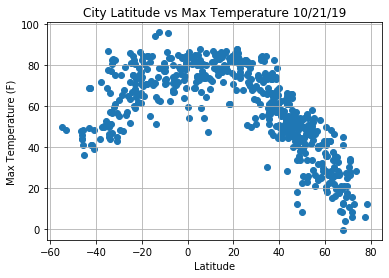

In [6]:
# Build a scatter plot for each data type
plt.scatter(citydata_df["Lat"], citydata_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature " + currdate)  
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

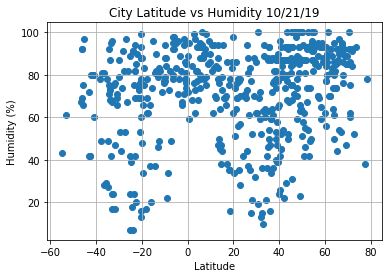

In [7]:
# Build a scatter plot for each data type
plt.scatter(citydata_df["Lat"], citydata_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity "  + currdate)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

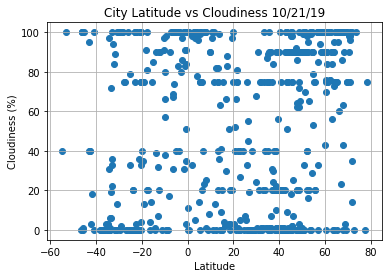

In [8]:
# Build a scatter plot for each data type
plt.scatter(citydata_df["Lat"], citydata_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness " + currdate)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

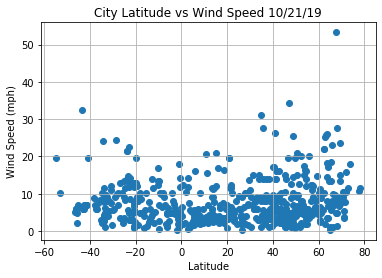

In [9]:
# Build a scatter plot for each data type
plt.scatter(citydata_df["Lat"], citydata_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed " + currdate)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatVsWindSpeed.png")

# Show plot
plt.show()

Observable trends based on the data: 

1)Latitude has little effect on wind speed.  Although there are a few more cities with greater wind speeds at higher latitudes, wind speed is generalaly within 0 and 15 regardless of latitude. 

2)Doesn't appear to be a pattern with latitude and cloudiness. Cities are all over the place.

3)Majority of 500 cities seems to have humidity between 60 and 100% regardless of the latitude. Although at -40 and 0 latitudes and again at 9 and 50 latitudes, humidy is between 0 and 60% for about 1/5th (eyeballing it) of the cities.

4)There seems to be a clear pattern between latitude and max temperature for most cities.  Max temperatuers appear to be highest between -20 and 40 latitude.  Max temps appear to increase between -38 and -20 latitude and decrease between 20 and 80 latitude. 